In [1]:
import numpy as np
import pandas as pd
import pickle
import os
import json
from sklearn.metrics import confusion_matrix as sklearn_cm
from scipy.special import softmax
from scipy.stats import entropy


In [2]:
from collections import Counter


In [3]:
def load_json(directory, filename):
    with open(os.path.join(directory, filename), 'r') as f:
        
        data = json.load(f)
    
    return data


In [4]:
def load_pickle(result_dir, filename):
    with open(os.path.join(result_dir, filename), 'rb') as f:
        data = pickle.load(f)
    
    return data

In [5]:
def calculate_balanced_accuracy(true_labels, predicted_labels, return_type='balanced_accuracy'):
    '''
    used particularly for this 3-classes classification task
    '''
    
    confusion_matrix = sklearn_cm(true_labels, predicted_labels)
    
    class0_recall = confusion_matrix[0,0]/np.sum(confusion_matrix[0])
    class1_recall = confusion_matrix[1,1]/np.sum(confusion_matrix[1])
    class2_recall = confusion_matrix[2,2]/np.sum(confusion_matrix[2])
    
    balanced_accuracy = (1/3)*class0_recall + (1/3)*class1_recall + (1/3)*class2_recall
    
    if return_type == 'all':
        return balanced_accuracy * 100, class0_recall * 100, class1_recall * 100, class2_recall * 100
    elif return_type == 'balanced_accuracy':
        return balanced_accuracy * 100
    else:
        raise NameError('Unsupported return_type in this calculate_balanced_accuracy fn')


### Get test patient study image grouping

In [6]:
StudyOrderInfo_dir = 'YOUR_PATH/ML_DATA/ViewClassifier/seed2/shared_test_this_seed/study_order_info'

study_order_list = load_json(StudyOrderInfo_dir, 'ForPatientTestSet_test_study_order_list.json')
studylevel_count_dicts = load_json(StudyOrderInfo_dir, 'ForPatientTestSet_test_study_level_count_dicts.json')


In [7]:
Simplified_study_order_list = []
for study in study_order_list:
    if study not in Simplified_study_order_list:
        Simplified_study_order_list.append(study)
        
Simplified_study_order_list

['2927484',
 '2501169',
 '1079880',
 '1313468',
 '2142875',
 '1530039',
 '1762785',
 '2746976',
 '1337491',
 '1285763',
 '2736929',
 '851753',
 '2649221',
 '1928248',
 '2947216',
 '2957735',
 '1996889',
 '1176449',
 '2075458',
 '2854483',
 '2929673',
 '1597315',
 '2906335',
 '2803476',
 '2626327',
 '1346596',
 '2967008',
 '2962243',
 '2923900',
 '1625126',
 '2703281',
 '2321444',
 '2888108',
 '1214437',
 '3016995',
 '2968758',
 '2958254',
 '2928098',
 '11081934',
 '2932661',
 '2449273',
 '1165710',
 '2901449',
 '2451912',
 '905160',
 '2913580',
 '870387',
 '2148551',
 '2960153',
 '1924090',
 '2680838',
 '2170811',
 '2720508',
 '1017540',
 '1878851',
 '2868730',
 '2996591',
 '2744040',
 '2169981',
 '1860438',
 '1240392',
 '2413046',
 '940995',
 '2636326',
 '1240962',
 '1970769',
 '2975679',
 '2869252',
 '2780612',
 '2382881',
 '2918093',
 '1844577',
 '2581901',
 '2196796',
 '2479899',
 '2576702',
 '2539723',
 '1428264',
 '1326437',
 '2724639',
 '3088064',
 '2558475',
 '1691698',
 '21632

In [8]:
num_studies = len(Simplified_study_order_list)
print('num_studies: {}'.format(num_studies))

Simplified_study_ImageCount_list = []
Simplified_study_DataIndicesRange_list = []

for study in Simplified_study_order_list:
    print('processing study: {}'.format(study))
    this_study_number_images = 0
    for diagnosis_label, counts in studylevel_count_dicts[study]['diagnosislabels_count'].items():
        print('diagnosis: {}, count: {}'.format(diagnosis_label, counts))
        this_study_number_images += counts
    
    
    assert this_study_number_images == Counter(study_order_list)[study]
        
    Simplified_study_ImageCount_list.append(this_study_number_images)
    print('\n')
    
Simplified_study_DataIndicesEndpoints_list = np.insert(np.cumsum(Simplified_study_ImageCount_list), 0, 0)
print('Simplified_study_DataIndicesEndpoints_list: {}'.format(Simplified_study_DataIndicesEndpoints_list))

for i in range(num_studies):
    Simplified_study_DataIndicesRange_list.append((Simplified_study_DataIndicesEndpoints_list[i], Simplified_study_DataIndicesEndpoints_list[i+1]))
        
print('Simplified_study_DataIndicesRange_list: {}'.format(Simplified_study_DataIndicesRange_list))
    

num_studies: 120
processing study: 2927484
diagnosis: no_AS, count: 59
diagnosis: mild_AS, count: 0
diagnosis: mildtomod_AS, count: 0
diagnosis: moderate_AS, count: 0
diagnosis: severe_AS, count: 0


processing study: 2501169
diagnosis: no_AS, count: 68
diagnosis: mild_AS, count: 0
diagnosis: mildtomod_AS, count: 0
diagnosis: moderate_AS, count: 0
diagnosis: severe_AS, count: 0


processing study: 1079880
diagnosis: no_AS, count: 75
diagnosis: mild_AS, count: 0
diagnosis: mildtomod_AS, count: 0
diagnosis: moderate_AS, count: 0
diagnosis: severe_AS, count: 0


processing study: 1313468
diagnosis: no_AS, count: 57
diagnosis: mild_AS, count: 0
diagnosis: mildtomod_AS, count: 0
diagnosis: moderate_AS, count: 0
diagnosis: severe_AS, count: 0


processing study: 2142875
diagnosis: no_AS, count: 60
diagnosis: mild_AS, count: 0
diagnosis: mildtomod_AS, count: 0
diagnosis: moderate_AS, count: 0
diagnosis: severe_AS, count: 0


processing study: 1530039
diagnosis: no_AS, count: 59
diagnosis: mil

In [9]:
Counter(study_order_list)

Counter({'2927484': 59,
         '2501169': 68,
         '1079880': 75,
         '1313468': 57,
         '2142875': 60,
         '1530039': 59,
         '1762785': 86,
         '2746976': 66,
         '1337491': 96,
         '1285763': 82,
         '2736929': 93,
         '851753': 66,
         '2649221': 63,
         '1928248': 81,
         '2947216': 79,
         '2957735': 71,
         '1996889': 82,
         '1176449': 70,
         '2075458': 80,
         '2854483': 44,
         '2929673': 65,
         '1597315': 71,
         '2906335': 72,
         '2803476': 64,
         '2626327': 100,
         '1346596': 67,
         '2967008': 65,
         '2962243': 90,
         '2923900': 84,
         '1625126': 68,
         '2703281': 67,
         '2321444': 67,
         '2888108': 85,
         '1214437': 68,
         '3016995': 94,
         '2968758': 67,
         '2958254': 72,
         '2928098': 76,
         '11081934': 74,
         '2932661': 75,
         '2449273': 68,
         '11657

### Perform study level integration

### FS + MU

In [10]:
candidate_view_dirs = [

    'PATH_TO_THE_MODEL'
]




candidate_diagnosis_dirs = [
    'PATH_TO_THE_MODEL/ForPatientTestSet_diagnosis_predictions/ema'
]


In [13]:
confidence_threshold_list = [0.83]

entropy_threshold_list = [0.8]


for confidence_threshold in confidence_threshold_list:
    print('Current confidence threshold: {}'.format(confidence_threshold))
    
    for entropy_threshold in entropy_threshold_list:
        print('Current entropy threshold: {}'.format(entropy_threshold))

        checkpoint_combination_list = []
        ConfidenceBased_PrioritizedView_BalancedAccuracy_list = []
        ConfidencedBased_PrioritizedView_predictions_list = []

        studies_relevance_list = []


        for candidate_view_dir in candidate_view_dirs:
            candidate_view = os.path.join(candidate_view_dir, 'ForPatientTestSet_predictions/ema')

            View_predictions = load_pickle(candidate_view, 'test_predictions.pkl')

            for candidate_diagnosis in candidate_diagnosis_dirs:

                Diagnosis_predictions = load_pickle(candidate_diagnosis, 'test_predictions.pkl')

                #perform integration
                Diagnosis_true_labels = Diagnosis_predictions['true_labels']
                View_true_labels = View_predictions['true_labels']

                Diagnosis_predictions_values = Diagnosis_predictions['ema_predictions']
        #         Diagnosis_predictions_values = softmax(Diagnosis_predictions_values, axis=1)

                View_predictions_values = View_predictions['ema_predictions']
        #         View_predictions_values = softmax(View_predictions_values, axis=1)


                ConfidencedBased_PrioritizedView_predicted_labels = []
                ConfidencedBased_PrioritizedView_predictions = []

                study_true_diagnosis_labels = []
                
                num_escape_study=0
                for idx, study in enumerate(Simplified_study_order_list):
        #             print('Currently aggregating predictions for {}'.format(study).center(100, '-'))
                    this_study_data_indices = list(range(Simplified_study_DataIndicesRange_list[idx][0], Simplified_study_DataIndicesRange_list[idx][1]))

                    this_study_diagnosis_predictions = Diagnosis_predictions_values[this_study_data_indices]
                    this_study_view_predictions = View_predictions_values[this_study_data_indices]
                    this_study_view_true_labels = View_true_labels[this_study_data_indices]

                    this_study_ViewRelevance =  np.sum(this_study_view_predictions[:,:2], axis=1)
                    this_study_ViewEntropy = entropy(this_study_view_predictions, axis=1)

                    #experiment with confidence level
                    confidence_mask = this_study_ViewRelevance >= confidence_threshold

                    entropy_mask = this_study_ViewEntropy <= entropy_threshold
                    
                    final_mask = np.logical_and(confidence_mask, entropy_mask)
                    if np.sum(final_mask)<=0:
                        num_escape_study+=1
                        continue
                    

                    this_study_diagnosis_true_labels = Diagnosis_true_labels[this_study_data_indices]
                    assert len(list(set(this_study_diagnosis_true_labels))) == 1, '1 study can only have 1 diagnosis label'
                    this_study_diagnosis_single_label = this_study_diagnosis_true_labels[0]
                    study_true_diagnosis_labels.append(this_study_diagnosis_single_label)


                    #ConfidenceBased_PrioritizedView
                #     print('this_study_view_predictions[:,:2] shape: {}'.format(this_study_view_predictions[:,:2].shape))
        #                 print('this_study_ViewRelevance: {}, this_study_view_true_labels: {}'.format(this_study_ViewRelevance,this_study_view_true_labels))
                    studies_relevance_list.append(this_study_ViewRelevance)

                #     print('this_study_diagnosis_predictions * this_study_ViewRelevance[:, np.newaxis] shape:{}'.format((this_study_diagnosis_predictions * this_study_ViewRelevance[:, np.newaxis]).shape))

                    this_study_DiagnosisPrediction_with_ViewRelevance = this_study_diagnosis_predictions * this_study_ViewRelevance[:, np.newaxis]
                    this_study_DiagnosisPrediction_with_ViewRelevance = this_study_DiagnosisPrediction_with_ViewRelevance[final_mask]
                    this_study_DiagnosisPrediction_with_ViewRelevance = np.mean(this_study_DiagnosisPrediction_with_ViewRelevance, axis=0)
        #                 print('this_study_DiagnosisPrediction_with_ViewRelevance: {}'.format(this_study_DiagnosisPrediction_with_ViewRelevance))

                    this_study_DiagnosisPredictedLabel_with_ViewRelevance = np.argmax(this_study_DiagnosisPrediction_with_ViewRelevance)

                    #record this patient's ConfidenceBased_PrioritizedView predictions and predicted labels
                    ConfidencedBased_PrioritizedView_predictions.append(this_study_DiagnosisPrediction_with_ViewRelevance)
                    ConfidencedBased_PrioritizedView_predicted_labels.append(this_study_DiagnosisPredictedLabel_with_ViewRelevance)
        #                 print('true_diagnosis:{}, ConfidenceBased_PrioritizedView predicted_diagnosis:{}\n'.format(this_study_diagnosis_single_label, this_study_DiagnosisPredictedLabel_with_ViewRelevance))
                
                    
                ConfidencedBased_PrioritizedView_predictions = np.array(ConfidencedBased_PrioritizedView_predictions)

        #                 print('\n\n')
                ConfidenceBased_PrioritizedView_balanced_accuracy = calculate_balanced_accuracy(study_true_diagnosis_labels, ConfidencedBased_PrioritizedView_predicted_labels)
                print('view: {}\n\ndiagnosis: {}\n'.format(candidate_view, candidate_diagnosis))
                print('num_escape_study: {}'.format(num_escape_study))
                print('ConfidenceBased_PrioritizedView_balanced_accuracy: {}\n\n'.format(ConfidenceBased_PrioritizedView_balanced_accuracy))
            
                
                #records
                checkpoint_combination_list.append((candidate_view, candidate_diagnosis))
                ConfidenceBased_PrioritizedView_BalancedAccuracy_list.append(ConfidenceBased_PrioritizedView_balanced_accuracy)
                ConfidencedBased_PrioritizedView_predictions_list.append(ConfidencedBased_PrioritizedView_predictions)
        #                 
        checkpoint_combination_list = np.array(checkpoint_combination_list)
        ConfidenceBased_PrioritizedView_BalancedAccuracy_list = np.array(ConfidenceBased_PrioritizedView_BalancedAccuracy_list)
        ConfidencedBased_PrioritizedView_predictions_list = np.array(ConfidencedBased_PrioritizedView_predictions_list)
        study_true_diagnosis_labels = np.array(study_true_diagnosis_labels)




Current confidence threshold: 0.83
Current entropy threshold: 0.8
view: /cluster/tufts/hugheslab/zhuang12/Echo_ClinicalManualScript_1112/experiments/ViewClassifier/seed2/DEV479/echo/FSBaseline_A2C_batch31_A4C_batch41_PLAX_PSAX_upweight_factor5_PLAX_batch60_PSAX_batch22_UsefulUnlabeled_batch44_archresnet_class_weights1.18,3.21,1.72,2.28,1.61_dropout_rate0.0_ema0.999_filters32_lr0.0007_nclass5_repeat4_scales4_smoothing0.001_wd0.02/ForPatientTestSet_predictions/ema

diagnosis: /cluster/tufts/hugheslab/zhuang12/Echo_ClinicalManualScript_1112/experiments/MultitaskClassifier/Baseline4/seed2/DEV479/echo/PLAX_PSAX_upweight_factor1_auxiliary_task_weight1.0_batch120_diagnosis_class_weights0.526,0.408,0.067_diagnosis_nclass3_dropout_rate0.0_ema0.999_filters32_lr0.018_repeat4_scales4_view_class_weights0.106,0.303,0.223,0.292,0.077_view_nclass5_wd0.02/ForPatientTestSet_diagnosis_predictions/ema

num_escape_study: 0
ConfidenceBased_PrioritizedView_balanced_accuracy: 76.24183006535947




In [14]:
print('checkpoint_combination_list shape: {}'.format(checkpoint_combination_list.shape))
print('ConfidenceBased_PrioritizedView_BalancedAccuracy_list shape: {}'.format(ConfidenceBased_PrioritizedView_BalancedAccuracy_list.shape))
print('ConfidencedBased_PrioritizedView_predictions_list shape: {}'.format(ConfidencedBased_PrioritizedView_predictions_list.shape))
print('study_true_diagnosis_labels shape: {}'.format(study_true_diagnosis_labels.shape))


checkpoint_combination_list shape: (1, 2)
ConfidenceBased_PrioritizedView_BalancedAccuracy_list shape: (1,)
ConfidencedBased_PrioritizedView_predictions_list shape: (1, 120, 3)
study_true_diagnosis_labels shape: (120,)


### AUC analysis:

In [18]:
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(color_codes=True)


#### Priority1:  noAS vs (earlyAS+SignificantAS)

In [19]:
def noASvsEarlySignificantAS(predictions, true_labels):
    
    normalized_true_labels = [0 if i == 0 else 1 for i in true_labels]
    
    print('original predictions is {}, shape {}'.format(predictions, predictions.shape))
    normalized_predictions = np.concatenate((predictions[:,0][:,np.newaxis], np.sum(predictions[:,1:], axis=1)[:,np.newaxis]), axis=1)
    print('normalized predictions is {}, shape {}'.format(normalized_predictions, normalized_predictions.shape))
    
    normalized_predictions = normalized_predictions/np.sum(normalized_predictions, axis=1, keepdims=True)
    print('original predictions is {}, shape {}'.format(predictions, predictions.shape))
    
    fpr, tpr, thresholds = roc_curve(normalized_true_labels, normalized_predictions[:,1])
    auc = round(roc_auc_score(normalized_true_labels, normalized_predictions[:,1]), 3)
    
    return fpr, tpr, thresholds, auc


original predictions is [[0.5655185  0.33033004 0.10344926]
 [0.88934577 0.0357686  0.07353476]
 [0.95020664 0.03326887 0.01580332]
 [0.5070551  0.26557603 0.22508639]
 [0.66264623 0.15730868 0.17238732]
 [0.7970767  0.13193212 0.07074302]
 [0.469425   0.11164407 0.39988247]
 [0.8658032  0.09790463 0.03602423]
 [0.396412   0.395583   0.19663422]
 [0.5458518  0.18821298 0.25418082]
 [0.74407595 0.08292858 0.1547706 ]
 [0.4366497  0.28261408 0.27008715]
 [0.9581564  0.01669344 0.02499441]
 [0.9043432  0.02642154 0.06719726]
 [0.8548989  0.08722968 0.0548792 ]
 [0.6823693  0.2544728  0.03752794]
 [0.8259812  0.08588517 0.08271247]
 [0.7882014  0.10297669 0.0966216 ]
 [0.51602596 0.15125687 0.32005605]
 [0.6997333  0.2704935  0.02946507]
 [0.8597682  0.07111236 0.06586169]
 [0.764993   0.1440322  0.09026509]
 [0.66156894 0.12910035 0.19865002]
 [0.9347093  0.00720446 0.0551389 ]
 [0.7661815  0.03657993 0.19263306]
 [0.46092895 0.29609028 0.23371552]
 [0.31350434 0.46700037 0.2179826 ]
 [0.

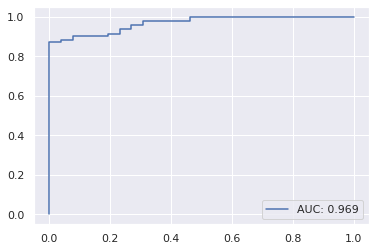

In [20]:
fpr, tpr, thresholds, auc = noASvsEarlySignificantAS(ConfidencedBased_PrioritizedView_predictions_list[0], study_true_diagnosis_labels)
plt.plot(fpr, tpr, label='AUC: {}'.format(auc))

plt.legend()
plt.show()
    

#### Priority2: earlyAS vs SignificantAS

In [21]:
def EarlyASvsSignificantAS(predictions, true_labels):
    
    to_keep_mask = true_labels != 0
    
    true_labels = true_labels[to_keep_mask]
    predictions = predictions[to_keep_mask]
    
    normalized_true_labels = [0 if i == 1 else 1 for i in true_labels]
    
    normalized_predictions = np.concatenate((predictions[:,1][:,np.newaxis], predictions[:,2][:,np.newaxis]), axis=1)
    normalized_predictions = normalized_predictions/np.sum(normalized_predictions, axis=1, keepdims=True)
    
    fpr, tpr, thresholds = roc_curve(normalized_true_labels, normalized_predictions[:,1])
    auc = round(roc_auc_score(normalized_true_labels, normalized_predictions[:,1]), 3)
    
    return fpr, tpr, thresholds, auc


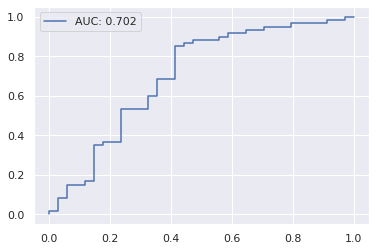

In [22]:
fpr, tpr, thresholds, auc = EarlyASvsSignificantAS(ConfidencedBased_PrioritizedView_predictions_list[0], study_true_diagnosis_labels)
plt.plot(fpr, tpr, label='AUC: {}'.format(auc))

plt.legend()
plt.show()
    

#### Others to look at: 

##### noAS vs earlyAS

In [23]:
def NoASvsEarlyAS(predictions, true_labels):
    
    to_keep_mask = true_labels != 2
    
    true_labels = true_labels[to_keep_mask]
    predictions = predictions[to_keep_mask]
    
    normalized_true_labels = [0 if i == 0 else 1 for i in true_labels]
    
    normalized_predictions = np.concatenate((predictions[:,0][:,np.newaxis], predictions[:,1][:,np.newaxis]), axis=1)
    normalized_predictions = normalized_predictions/np.sum(normalized_predictions, axis=1, keepdims=True)
    
    fpr, tpr, thresholds = roc_curve(normalized_true_labels, normalized_predictions[:,1])
    auc = round(roc_auc_score(normalized_true_labels, normalized_predictions[:,1]), 3)
    
    return fpr, tpr, thresholds, auc

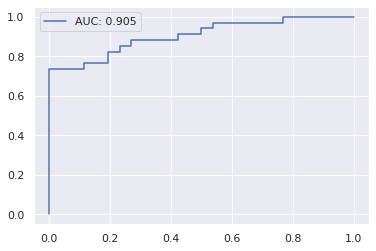

In [24]:
fpr, tpr, thresholds, auc = NoASvsEarlyAS(ConfidencedBased_PrioritizedView_predictions_list[0], study_true_diagnosis_labels)
plt.plot(fpr, tpr, label='AUC: {}'.format(auc))

plt.legend()
plt.show()
    

##### (noAS + earlyAS) vs SignificantAS

In [25]:
def NoEarlyASvsSignificantAS(predictions, true_labels):
    
    normalized_true_labels = [1 if i == 2 else 0 for i in true_labels]
    
    normalized_predictions = np.concatenate((np.sum(predictions[:,:1], axis=1)[:,np.newaxis], predictions[:,2][:,np.newaxis]), axis=1)
    normalized_predictions = normalized_predictions/np.sum(normalized_predictions, axis=1, keepdims=True)
    
    fpr, tpr, thresholds = roc_curve(normalized_true_labels, normalized_predictions[:,1])
    auc = round(roc_auc_score(normalized_true_labels, normalized_predictions[:,1]), 3)
    
    return fpr, tpr, thresholds, auc


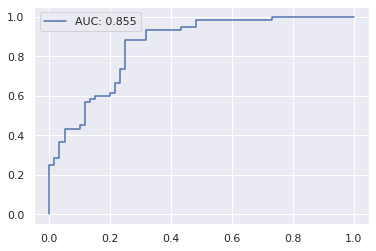

In [26]:
fpr, tpr, thresholds, auc = NoEarlyASvsSignificantAS(ConfidencedBased_PrioritizedView_predictions_list[0], study_true_diagnosis_labels)
plt.plot(fpr, tpr, label='AUC: {}'.format(auc))

plt.legend()
plt.show()
    

### Confusion Matrix

In [31]:
def plot_confusion_matrix(data, labels, output_filename, fontsize=20, normalized_option = None):
    """Plot confusion matrix using heatmap.
 
    Args:
        data (list of list): List of lists with confusion matrix data.
        labels (list): Labels which will be plotted across x and y axis.
        output_filename (str): Path to output file.
 
    """
    print('Inside plot_confusion_matrix, data is {}'.format(data), flush = True)
    sns.set(color_codes=True)
    plt.figure(1, figsize=(8, 8))
 
#     plt.title("Confusion Matrix")
    
    sns.set(font_scale=1.2)
    if normalized_option == 'Recall':
        data = data.astype(np.float16)
        data[0] = data[0]/np.sum(data[0])
        data[1] = data[1]/np.sum(data[1])
        data[2] = data[2]/np.sum(data[2])
        ax = sns.heatmap(data, annot=True, 
            fmt='.01%', cmap='Blues', annot_kws={"size": fontsize}, cbar=False)
    
        
    elif normalized_option == 'Error':
        data = data.astype(np.float16)
        np.fill_diagonal(data, 0)
        data = data/np.sum(data)
        ax = sns.heatmap(data, annot=True, 
            fmt='.01%', cmap='Blues', annot_kws={"size": fontsize}, cbar=False)
 
    else:
        ax = sns.heatmap(data, annot=True, 
            fmt='d', cmap='Blues', annot_kws={"size": fontsize}, cbar=False)
    
    #ax = sns.heatmap(data, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Scale'}, annot_kws={'size':16})
    
    ax.set_xticklabels(labels, fontsize=31)
    ax.set_yticklabels(labels, fontsize=31, verticalalignment='center')
 
    ax.set_xlabel('Predicted Label', fontsize=33)
    ax.set_ylabel('True Label', fontsize=33)
#     ax.set(ylabel="True Label", xlabel="Predicted Label")
    ax.set_ylim([3, 0])
    ax.set_title('split3', fontsize=30)

    plt.savefig(output_filename, bbox_inches='tight', dpi=1200)
#     plt.savefig(output_filename, bbox_inches='tight')

    plt.show()
    plt.close()

In [32]:
study_true_diagnosis_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Confidence-based prioritized

In [33]:
CFP_cm = sklearn_cm(study_true_diagnosis_labels, ConfidencedBased_PrioritizedView_predictions_list[0].argmax(1))
CFP_cm

array([[26,  0,  0],
       [ 8, 16, 10],
       [ 4,  7, 49]])

Inside plot_confusion_matrix, data is [[26  0  0]
 [ 8 16 10]
 [ 4  7 49]]


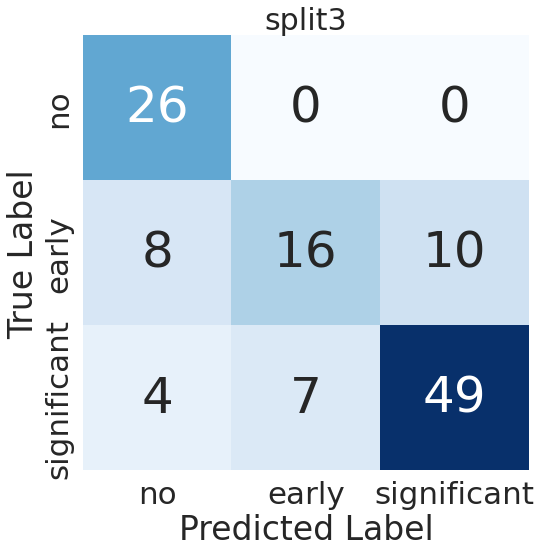

In [34]:
confusion_matrix_label = ['no', 'early', 'significant']
confusion_matrix_save_path = '/cluster/tufts/hugheslab/zhuang12/Echo_ClinicalManualScript_1112/make_plots/figures_20220130/confusion_matrix/FS_split2.png'

plot_confusion_matrix(CFP_cm, confusion_matrix_label, confusion_matrix_save_path, 50, normalized_option = None)
